In [14]:
import random
import trading_spy_with_many_discrete_actions_reward_type_1
import matplotlib.pyplot as plt
import numpy as np

In [15]:
max_simulation_length = 1000 # in unit of interval
min_history_length = 100 #in unit of interval
max_position = 10
init_cash_value = 10000

In [16]:
local_env = trading_spy_with_many_discrete_actions_reward_type_1.trading_spy(max_simulation_length,
                                                                            min_history_length,
                                                                            max_position,
                                                                            init_cash_value)

In [17]:
total_portfolio_value = []
stock_price = []
stock_percentage = []
recorded_action = [0]#i always start with all cash

hypothetical_action = []

for _ in range(0,5):
    hypothetical_action.append(random.randint(0,max_position))

In [18]:
observation_dict = local_env.reset()

total_portfolio_value.append(observation_dict['current_portfolio_value'])
stock_price.append(observation_dict['price_history'][-1])
stock_percentage.append(observation_dict['current_stock_ratio'])

In [19]:
for time_index in range(0,len(hypothetical_action)):
    
    action = hypothetical_action[time_index]
    
    observation_dict,reward,execute_action = local_env.step(action)

    total_portfolio_value.append(observation_dict['current_portfolio_value'])
    stock_price.append(observation_dict['price_history'][-1])
    stock_percentage.append(observation_dict['current_stock_ratio'])
    recorded_action.append(observation_dict['action'])

buying stocks
action is 3
cash amount is 7014.52
positions are [{'quantity': 3.0, 'price': 331.72}, {'quantity': 3.0, 'price': 331.72}, {'quantity': 3.0, 'price': 331.72}]
 
r is -985.6239999999997
selling stock
action is 2
cash amount is 8009.740000000001
positons are [{'quantity': 3.0, 'price': 331.72}, {'quantity': 3.0, 'price': 331.72}]
 
buying stocks
action is 10
cash amount is 47.26000000000158
positions are [{'quantity': 3.0, 'price': 331.72}, {'quantity': 3.0, 'price': 331.72}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}]
 
r is -6954.461999999998
selling stock
action is 3
cash amount is 7015.9000000000015
positons are [{'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}, {'quantity': 3.0, 'price': 331.77}]
 
buying sto

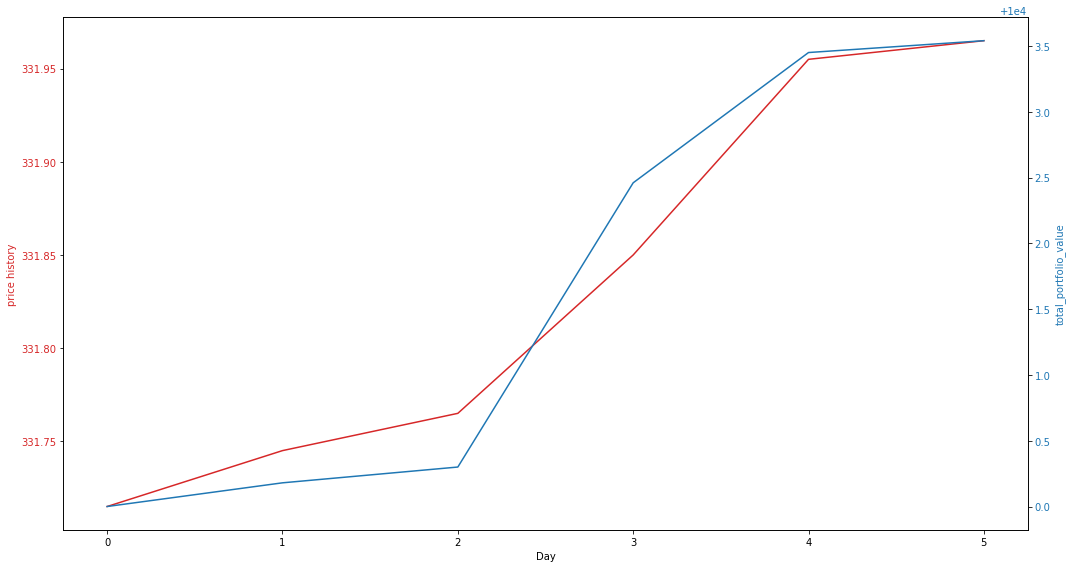

In [20]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(stock_price, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('total_portfolio_value', color=color)  # we already handled the x-label with ax1
ax2.plot(total_portfolio_value, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

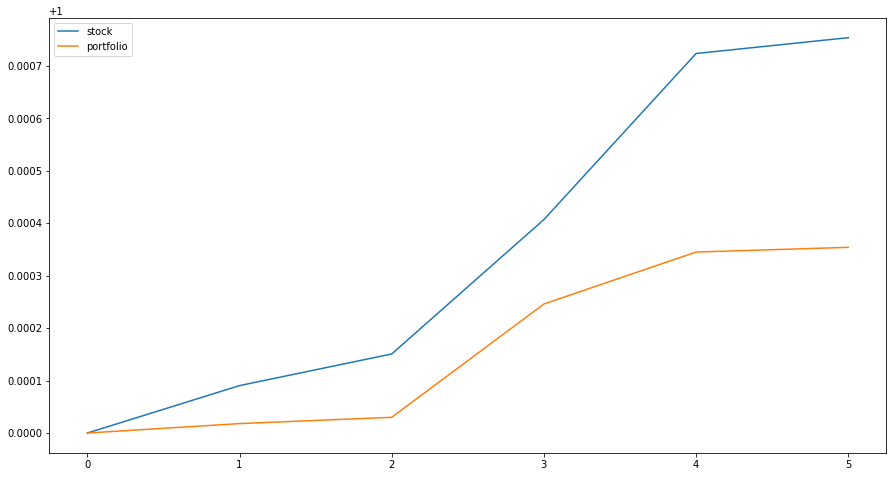

In [27]:
plt.rcParams["figure.figsize"] = (15,8)


plt.plot(np.asarray(stock_price)/stock_price[0],label = 'stock')
plt.plot(np.asarray(total_portfolio_value)/total_portfolio_value[0],label = 'portfolio')
plt.legend()
plt.show()

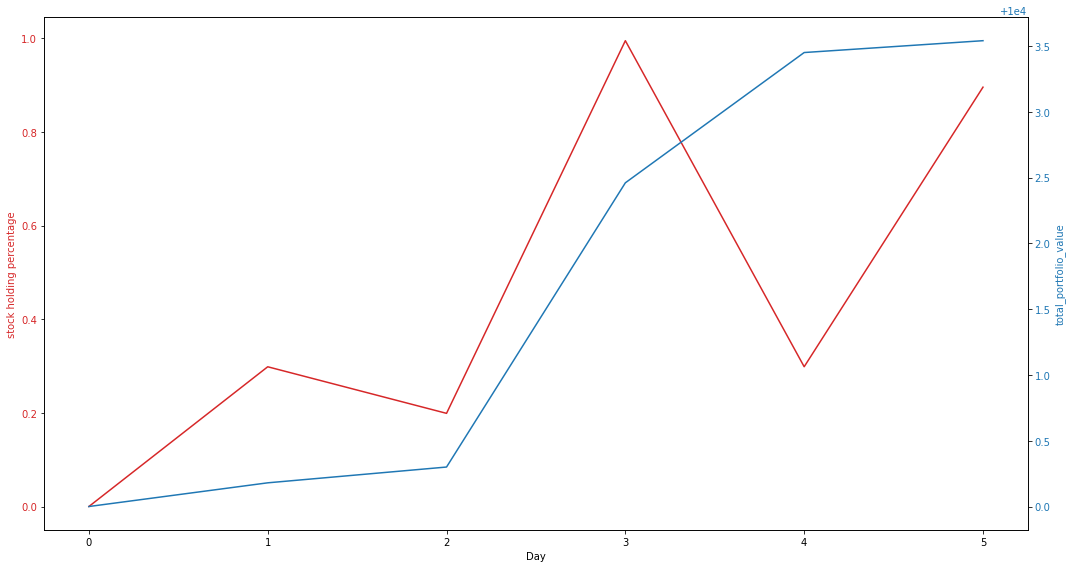

In [22]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('stock holding percentage', color=color)
ax1.plot(stock_percentage, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('total_portfolio_value', color=color)  # we already handled the x-label with ax1
ax2.plot(total_portfolio_value, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [24]:
print(len(total_portfolio_value))
print(len(stock_price))
print(len(stock_percentage))
print(len(hypothetical_action))
print(len(recorded_action))

6
6
6
5
6


In [28]:
print(recorded_action)
print(hypothetical_action)

[0, 3, 2, 10, 3, 9]
[3, 2, 10, 3, 9]


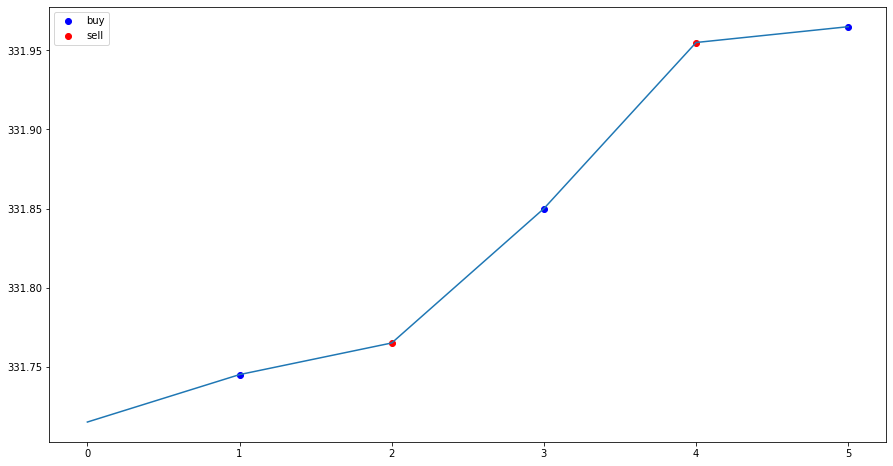

In [29]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(stock_price)
for time_index in range(1,len(recorded_action)):

    
    if recorded_action[time_index]>recorded_action[time_index-1]:
        #buy
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,stock_price[time_index],color = 'b',label = 'buy')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,stock_price[time_index],color = 'b')
        
    if recorded_action[time_index]<recorded_action[time_index-1]:
        #sell
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,stock_price[time_index],color = 'r',label = 'sell')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,stock_price[time_index],color = 'r')
    
plt.legend()
plt.show()